In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import plotly.graph_objs as go
from scipy.stats import gaussian_kde
import plotly.express as px


In [53]:
    def load_data(carpeta):
        df = {}
        for archivo in os.listdir(carpeta):
            if archivo.endswith('.csv') or archivo.endswith('.xlsx'):
                variable = os.path.splitext(archivo)[0]
                ruta = os.path.join(carpeta, archivo)
                if archivo.endswith('.csv'):
                    df[variable] = pd.read_csv(ruta)
                elif archivo.endswith('.xlsx'):
                    # Leer todas las hojas del archivo Excel
                    xls = pd.ExcelFile(ruta)
                    for sheet_name in xls.sheet_names:
                        # Crear un nombre único para cada hoja/variable
                        variable_hoja = f"{variable}_{sheet_name}"
                        df[variable_hoja] = pd.read_excel(ruta, sheet_name=sheet_name)
        return df

    carpeta_ruta = "C:/Users/franc/OneDrive - INTEC/Escritorio/Proyecto ARS/Bases de datos/BD FINAL"
    df = load_data(carpeta_ruta)

    def asignar_dfs_a_variables_globales(df):
        for clave, df in df.items():
            # Establece cada DataFrame en el diccionario como una variable global
            globals()[clave] = df
            
    asignar_dfs_a_variables_globales(df)



Analisi Sobre Afiliados


In [54]:
lista_Afiliados_1

,Región Geográfica/3,Región Salud,Provincia,Fecha,Afiliados C,Afiliados NO C,Dependencia por tirular
0,Región Distrito Nacional,0 - Santo Domingo,DISTRITO NACIONAL,200709,284414,181566,1.566450
1,Región Distrito Nacional,0 - Santo Domingo,MONTE PLATA,200709,4006,2568,1.559969
2,Región Distrito Nacional,0 - Santo Domingo,SANTO DOMINGO,200709,46438,20292,2.288488
3,Región Este,V - Este,SEIBO,200709,2467,1285,1.919844
4,Región Este,V - Este,HATO MAYOR,200709,3183,1589,2.003147
...,...,...,...,...,...,...,...
6463,Región Sur,IV - Enriquillo,PEDERNALES,202312,4752,2789,1.703837
6464,Región Sur,VI - El Valle,AZUA,202312,39776,41887,0.949603
6465,Región Sur,VI - El Valle,ELIAS,202312,21226,9016,2.354259
6466,Región Sur,VI - El Valle,SAN JUAN,202312,69502,43616,1.593498


In [55]:
lista_Afiliados_1['Fecha'] = pd.to_datetime(lista_Afiliados_1['Fecha'], format='%Y%m')

# Ordenar el DataFrame por 'Fecha'
lista_Afiliados_1.sort_values('Fecha', inplace=True)

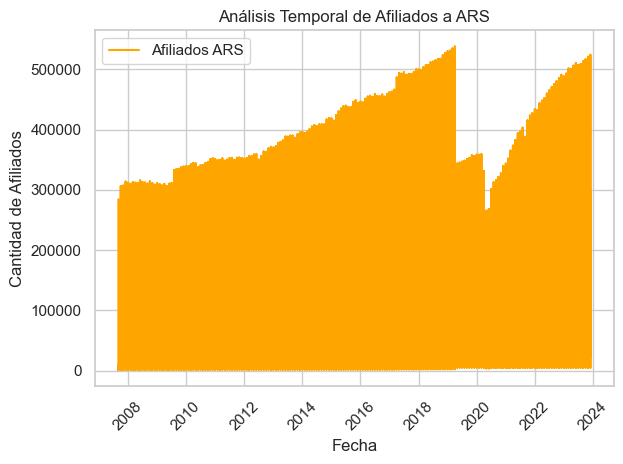

In [56]:

# Graficar la cantidad de afiliados. Cambia 'Afiliados C' por el nombre correcto de tu columna si es necesario.
plt.plot(lista_Afiliados_1['Fecha'], lista_Afiliados_1['Afiliados C'], label='Afiliados ARS', color='orange')

# Configuración de los títulos y etiquetas del gráfico
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Afiliados')
plt.title('Análisis Temporal de Afiliados a ARS')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


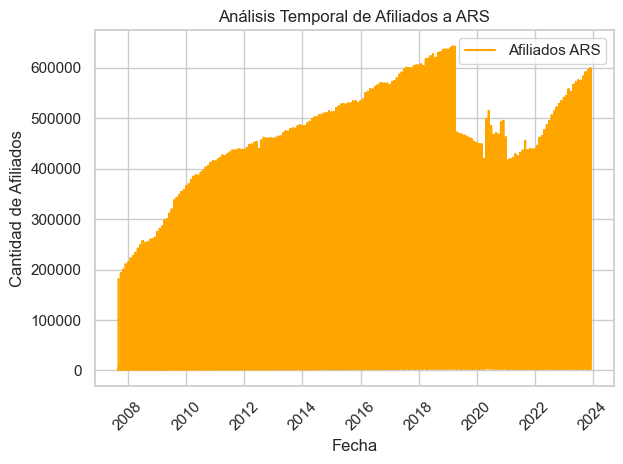

In [57]:
# Graficar la cantidad de afiliados. Cambia 'Afiliados C' por el nombre correcto de tu columna si es necesario.
plt.plot(lista_Afiliados_1['Fecha'], lista_Afiliados_1['Afiliados NO C'], label='Afiliados ARS', color='orange')

# Configuración de los títulos y etiquetas del gráfico
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Afiliados')
plt.title('Análisis Temporal de Afiliados a ARS')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


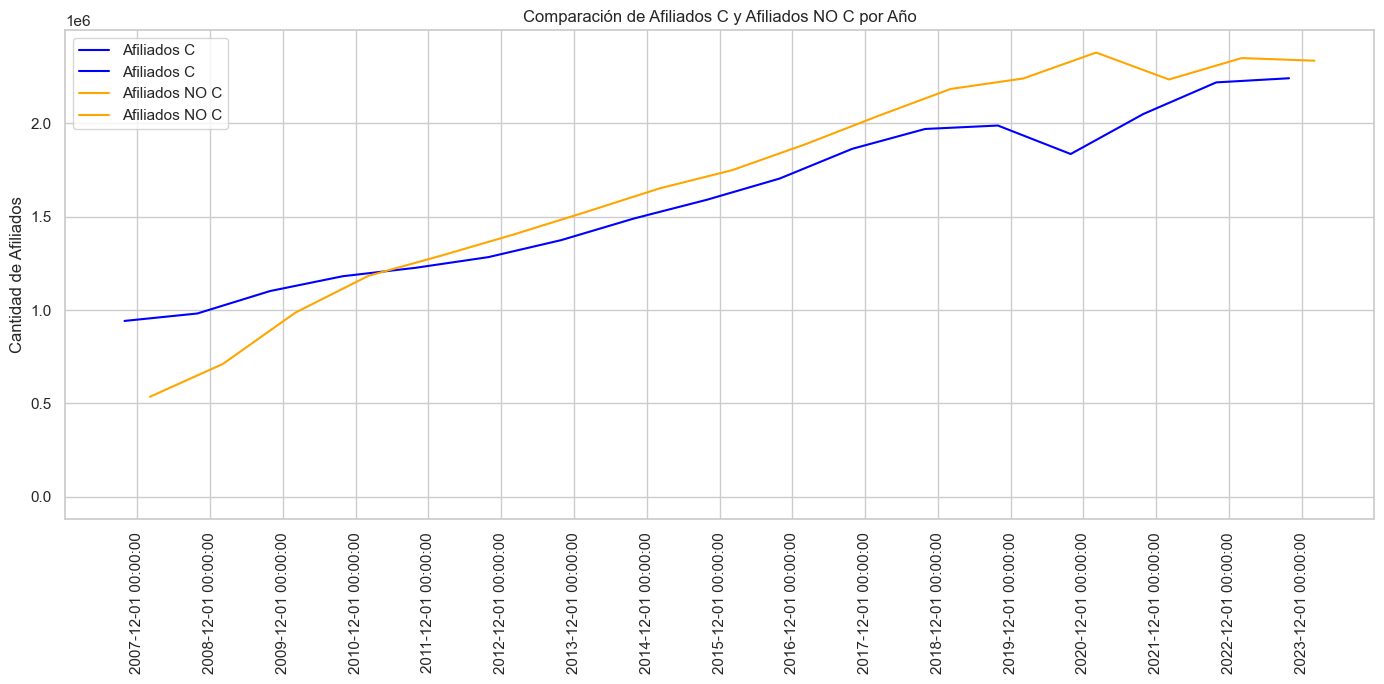

In [58]:
# Agrupar por año y sumar los afiliados C y NO C
afiliados2 = lista_Afiliados_1[lista_Afiliados_1["Fecha"].dt.month == 12]
afiliados_c_por_año = afiliados2.groupby('Fecha')['Afiliados C'].sum()
afiliados_no_c_por_año = afiliados2.groupby('Fecha')['Afiliados NO C'].sum()

# Configurar las posiciones de las barras
ancho = 0.35  # ancho de las barras
ind = np.arange(len(afiliados_c_por_año))  # las ubicaciones x para los grupos

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
barras_c = plt.plot(ind - ancho/2, afiliados_c_por_año, ancho, label='Afiliados C', color='blue')
barras_no_c = plt.plot(ind + ancho/2, afiliados_no_c_por_año, ancho, label='Afiliados NO C', color='orange')

# Etiquetas, títulos y configuración del gráfico
plt.ylabel('Cantidad de Afiliados')
plt.title('Comparación de Afiliados C y Afiliados NO C por Año')
plt.xticks(ind, afiliados_c_por_año.index, rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Afiliados Contitutivos por edad (Esto incluye a los dependientes no directos)

In [59]:
Afiliados_Por_Edad_1

,Fecha,Sexo,Edad,Afiliados C,Afiliados NO C
0,200709,Hombre,19 o menos,9157.0,42736.0
1,200710,Hombre,19 o menos,9846.0,46255.0
2,200711,Hombre,19 o menos,9796.0,48181.0
3,200712,Hombre,19 o menos,10666.0,50791.0
4,200801,Hombre,19 o menos,9854.0,51163.0
...,...,...,...,...,...
6282,202308,Mujer,No Especificada,0.0,18093.0
6283,202309,Mujer,No Especificada,0.0,18158.0
6284,202310,Mujer,No Especificada,0.0,18237.0
6285,202311,Mujer,No Especificada,0.0,18295.0


C:\Users\franc\AppData\Local\Temp\ipykernel_24136\2057402888.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\2057402888.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\2057402888.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

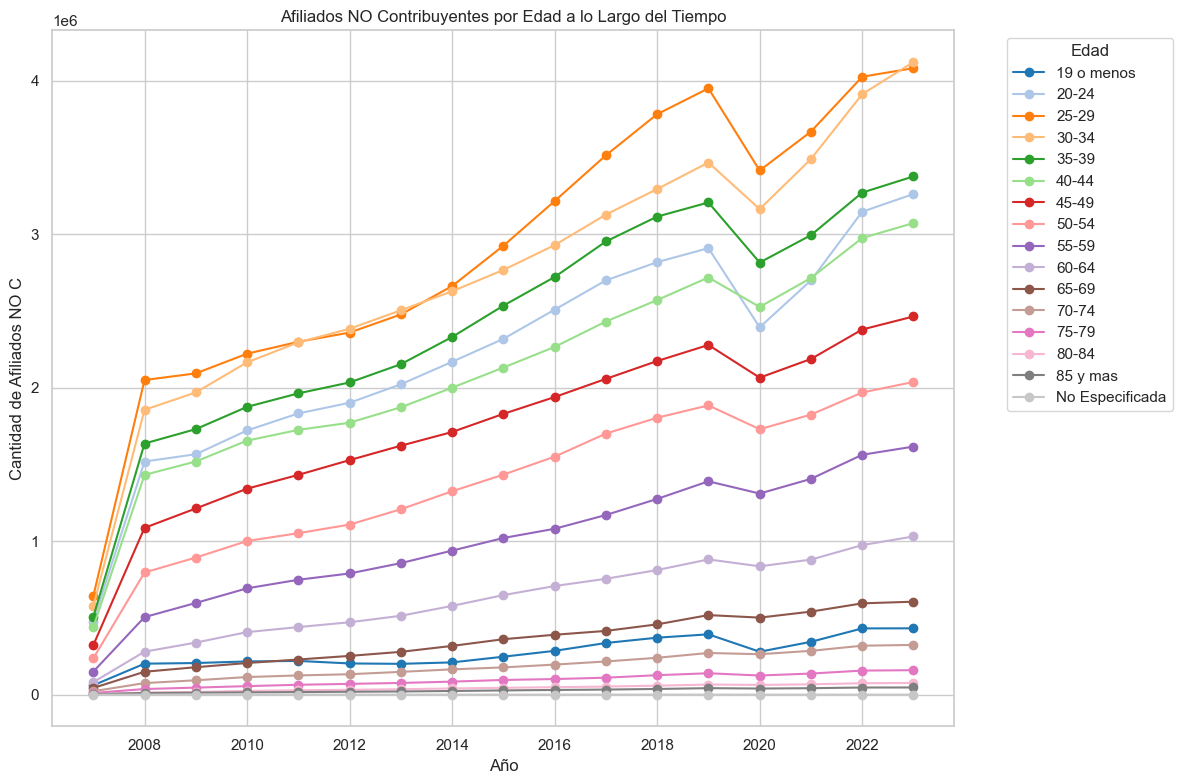

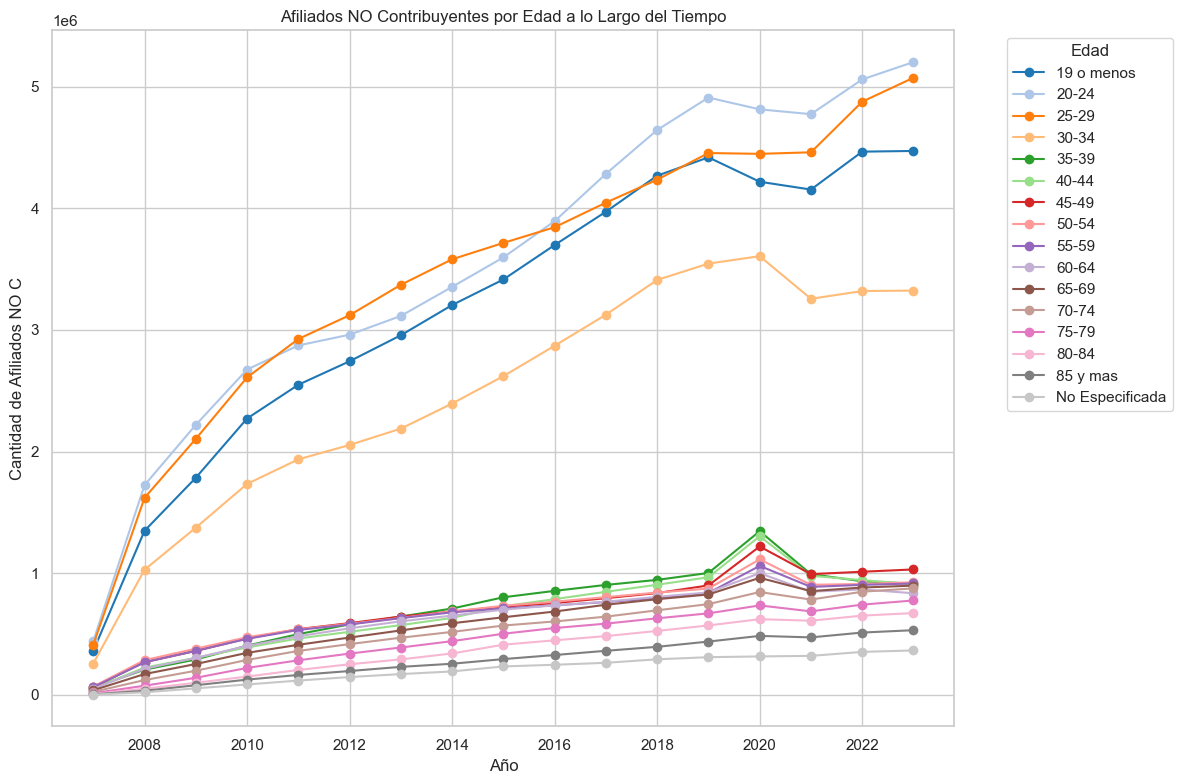

In [60]:
# Asegurarse de que 'Fecha' es un tipo datetime
is_numeric_fecha = pd.to_numeric(Afiliados_Por_Edad_1['Fecha'], errors='coerce').notnull()
Afiliados_Por_Edad_1 = Afiliados_Por_Edad_1[is_numeric_fecha]

# Ahora, intentamos convertir la columna 'Fecha' a datetime nuevamente.
Afiliados_Por_Edad_1['Fecha'] = pd.to_datetime(Afiliados_Por_Edad_1['Fecha'], format='%Y%m', errors='coerce')

# Eliminamos las filas donde la 'Fecha' es NaT (Not a Time) después de la conversión.
Afiliados_Por_Edad_1.dropna(subset=['Fecha'], inplace=True)

# Continúa con el análisis agregando la columna 'Año' y luego el agrupamiento.
Afiliados_Por_Edad_1['Año'] = Afiliados_Por_Edad_1['Fecha'].dt.year


# Análisis temporal por edad para 'Afiliados C'
afiliados_por_edad_no_c = Afiliados_Por_Edad_1.groupby(['Año', 'Edad'])['Afiliados C'].sum().unstack()
colores_no_c = sns.color_palette("tab20", len(afiliados_por_edad_no_c.columns))




# Graficar 'Afiliados NO C'
afiliados_por_edad_no_c.plot(kind='line', color=colores_no_c, marker='o', figsize=(12, 8))
plt.title('Afiliados NO Contribuyentes por Edad a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Afiliados NO C')
plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



# Análisis temporal por edad para 'Afiliados NO C'
afiliados_por_edad_no_c = Afiliados_Por_Edad_1.groupby(['Año', 'Edad'])['Afiliados NO C'].sum().unstack()
colores_no_c = sns.color_palette("tab20", len(afiliados_por_edad_no_c.columns))

# Graficar 'Afiliados NO C'
afiliados_por_edad_no_c.plot(kind='line', color=colores_no_c, marker='o', figsize=(12, 8))
plt.title('Afiliados NO Contribuyentes por Edad a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Afiliados NO C')
plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When gr

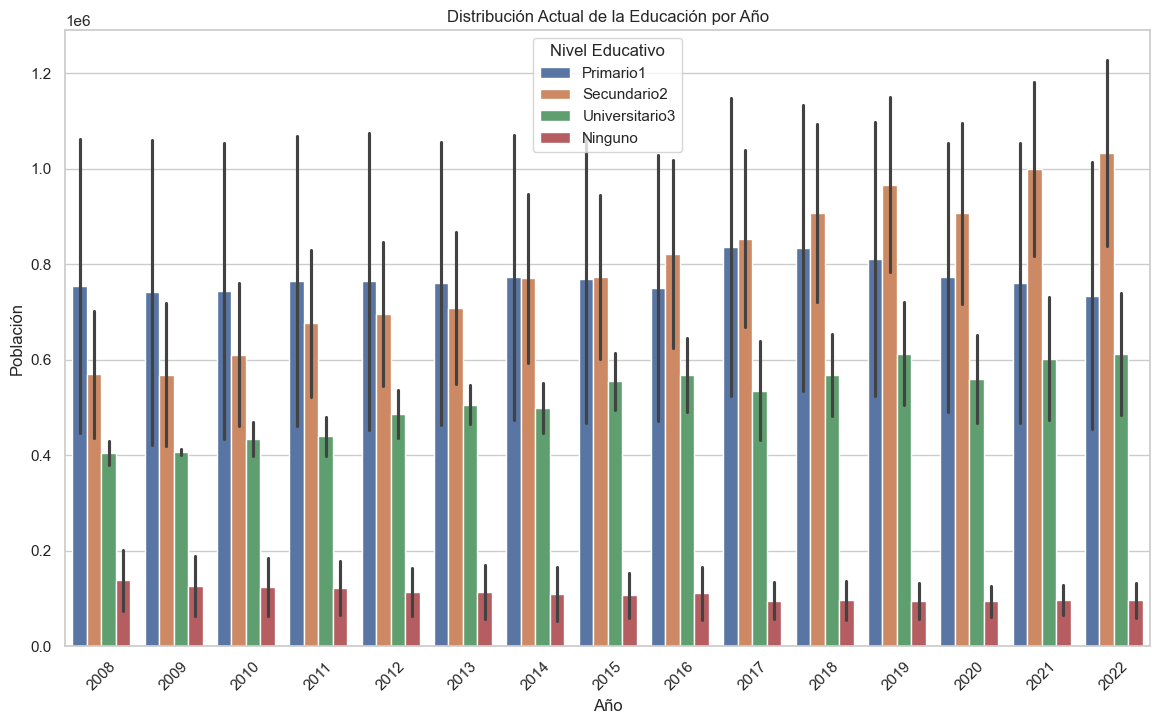

In [61]:
# Y luego, usaríamos Seaborn para hacer el gráfico:
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras usando 'hue' para separar los niveles educativos
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    data=Poblacion_Empleado_Educacion, 
    x='Año', 
    y='Poblacion', 
    hue='Nivel educativo'
)

plt.title('Distribución Actual de la Educación por Año')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend(title='Nivel Educativo')
plt.xticks(rotation=45)

plt.show()

In [62]:
Poblacion_Igresos_Establecimiento

,Unnamed: 0,Años,Tipo,Poblacion,Sexo
0,0,2008,Privado,64.744937,Hombre
1,1,2009,Privado,70.284613,Hombre
2,2,2010,Privado,73.266658,Hombre
3,3,2011,Privado,79.088464,Hombre
4,4,2012,Privado,79.242776,Hombre
...,...,...,...,...,...
85,85,2018,Zona Franca,69.447582,Mujer
86,86,2019,Zona Franca,78.489899,Mujer
87,87,2020,Zona Franca,66.847106,Mujer
88,88,2021,Zona Franca,82.563625,Mujer


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



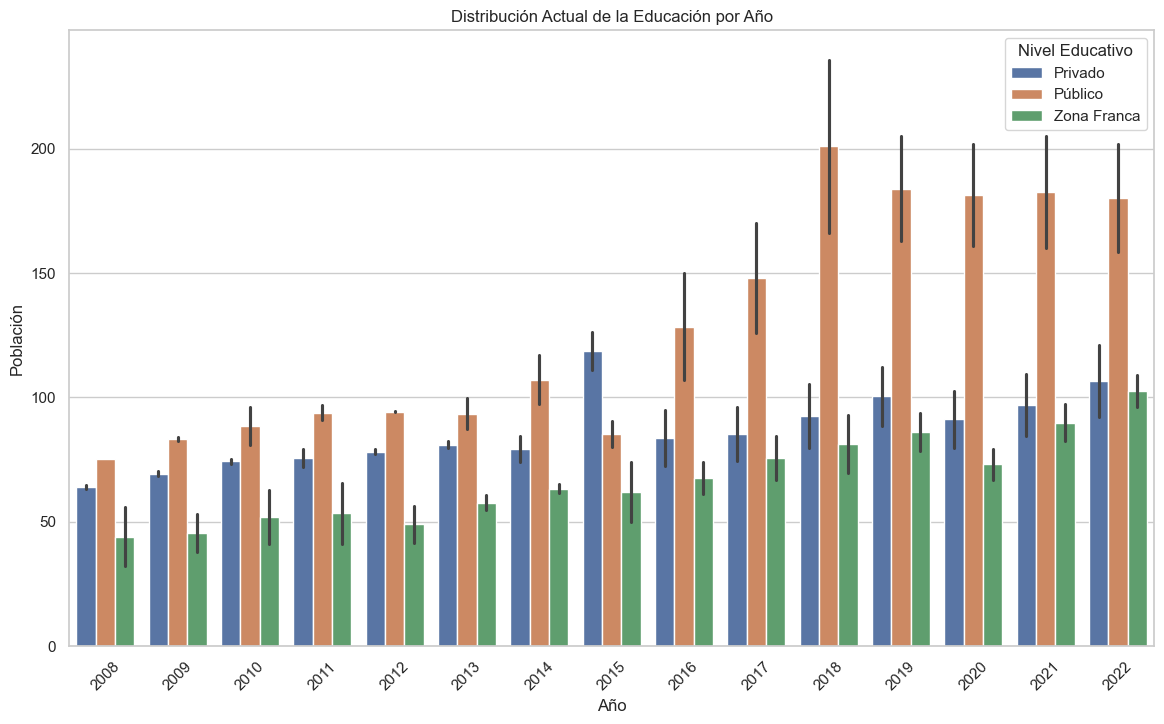

In [63]:
# Y luego, usaríamos Seaborn para hacer el gráfico:
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras usando 'hue' para separar los niveles educativos
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    data=Poblacion_Igresos_Establecimiento, 
    x='Años', 
    y='Poblacion', 
    hue='Tipo'
)

plt.title('Distribución Actual de la Educación por Año')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend(title='Nivel Educativo')
plt.xticks(rotation=45)

plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\4067009996.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\4067009996.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\4067009996.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\4067009996.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\4067009996.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\4067009996.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\franc\AppData\Local\Temp\ipykernel_24136\4067009996.py:10: UserWarning:

Ignoring `palette` because no `hue` 

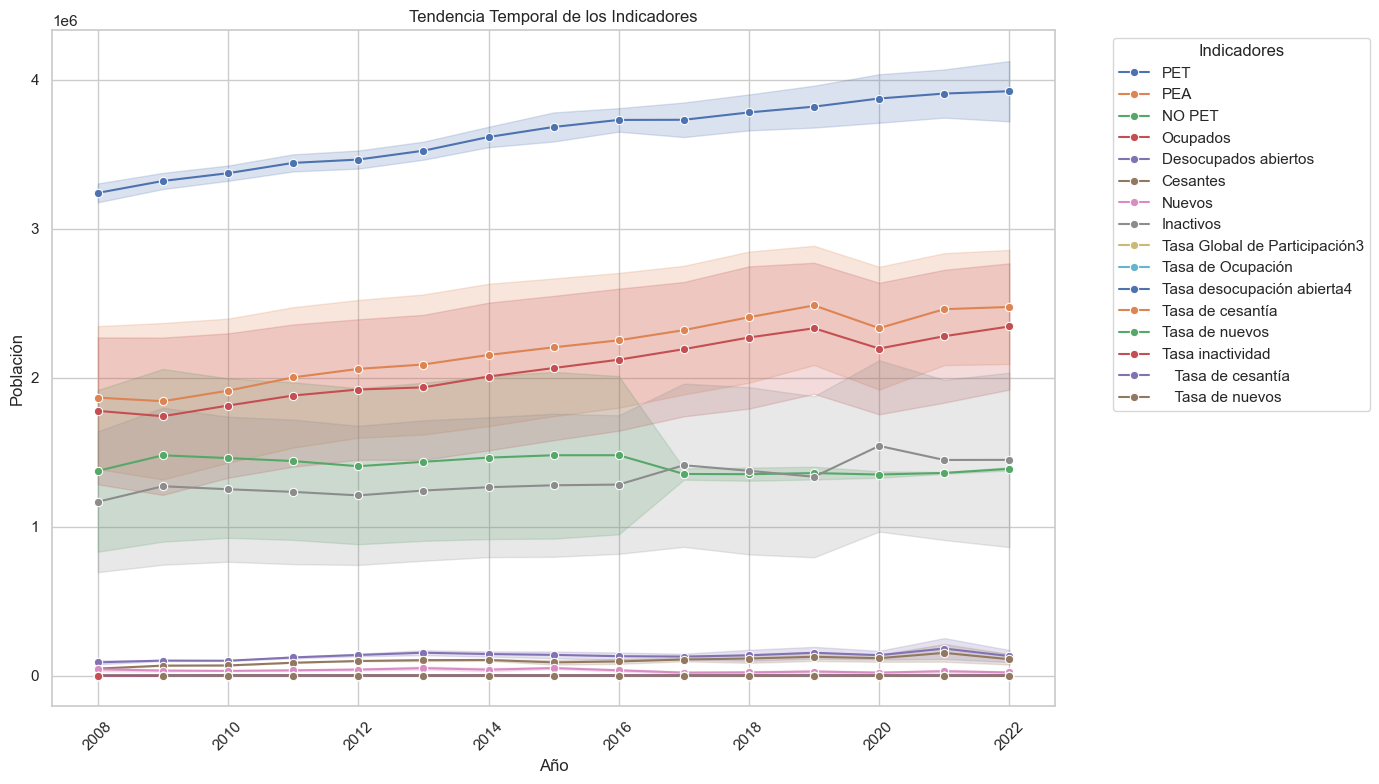

In [64]:
# Conversión de tipos de datos, si es necesario
Poblacion_Indicadores['Poblacion'] = pd.to_numeric(Poblacion_Indicadores['Poblacion'], errors='coerce')

# Crear un solo gráfico de líneas con Seaborn para cada indicador
plt.figure(figsize=(14, 8))

# Iterar sobre cada indicador único y dibujar un gráfico para cada uno
for indicador in Poblacion_Indicadores['Indicadores'].unique():
    df_temporal = Poblacion_Indicadores[Poblacion_Indicadores['Indicadores'] == indicador]
    sns.lineplot(data=df_temporal, x='Tipo', y='Poblacion', marker='o', linestyle='-', label=indicador, palette='tab20')

plt.title('Tendencia Temporal de los Indicadores')
plt.xlabel('Año')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.legend(title='Indicadores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [65]:
Finanzas_1

,Periodo,Gasto en Salud,Total capitas,Titulares,Dependientes Directos,Dependientes Adicionales,Ingresos en Salud,TitularesM,Dependientes DirectosM,Dependientes AdicionalesM,Monto per Capita,Siniestralidad,Media Dependientes
0,200709,2.934182e+08,1207909,786177,419106,2626,5.838187e+08,3.799829e+08,2.025665e+08,1.269225e+06,483.330000,50.258457,0.533094
1,200710,3.809709e+08,1534269,955329,576040,2900,7.415582e+08,4.617392e+08,2.784174e+08,1.401657e+06,483.330000,51.374377,0.602976
2,200711,5.681702e+08,1360641,851660,507515,1466,6.576386e+08,4.116328e+08,2.452972e+08,7.085618e+05,483.330000,86.395499,0.595913
3,200712,4.772080e+08,1599467,1005990,586713,6764,7.730704e+08,4.862251e+08,2.835760e+08,3.269244e+06,483.330000,61.728919,0.583220
4,200801,5.778195e+08,1511121,936466,569690,4965,9.333933e+08,5.780082e+08,3.523082e+08,3.076797e+06,617.682675,61.905261,0.608340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,202307,6.652869e+09,4652895,2126933,2275635,250327,7.235013e+09,3.307342e+09,3.538386e+09,3.892843e+08,1554.948715,91.953792,1.069914
191,202308,6.168124e+09,4643328,2124770,2267364,251194,7.220555e+09,3.304143e+09,3.525775e+09,3.906368e+08,1555.038655,85.424517,1.067110
192,202309,7.477738e+09,4652645,2126042,2274513,252090,7.235013e+09,3.306088e+09,3.536896e+09,3.920298e+08,1555.032351,103.354864,1.069834
193,202310,6.966769e+09,4672810,2134779,2286062,251969,7.266053e+09,3.319645e+09,3.554565e+09,3.918432e+08,1554.964345,95.881067,1.070866


In [66]:
Finanzas_1.dtypes

Periodo                        int64
Gasto en Salud               float64
Total capitas                  int64
Titulares                      int64
Dependientes Directos          int64
Dependientes Adicionales       int64
Ingresos en Salud            float64
TitularesM                   float64
Dependientes DirectosM       float64
Dependientes AdicionalesM    float64
Monto per Capita             float64
Siniestralidad               float64
Media Dependientes           float64
dtype: object

In [67]:
Finanzas_1['Fecha'] = pd.to_datetime(Finanzas_1['Periodo'], format='%Y%m')
Finanzas_1['Año'] = Finanzas_1['Fecha'].dt.year

# Agrupar los datos por año y sumar las columnas de interés
datos_agrupados = Finanzas_1.groupby('Año')[['Titulares', 'Dependientes Directos', 'Dependientes Adicionales']].sum().reset_index()

# Convertir el DataFrame agrupado de forma ancha a larga
datos_melted = datos_agrupados.melt(id_vars=['Año'], value_vars=['Titulares', 'Dependientes Directos', 'Dependientes Adicionales'],
                                    var_name='Categoría', value_name='Valor')

# Crear el gráfico de barras
fig = px.bar(datos_melted, x='Año', y='Valor', color='Categoría', title='Distribución por Año')

# Mostrar el gráfico
fig.show()

<Figure size 1800x1000 with 0 Axes>

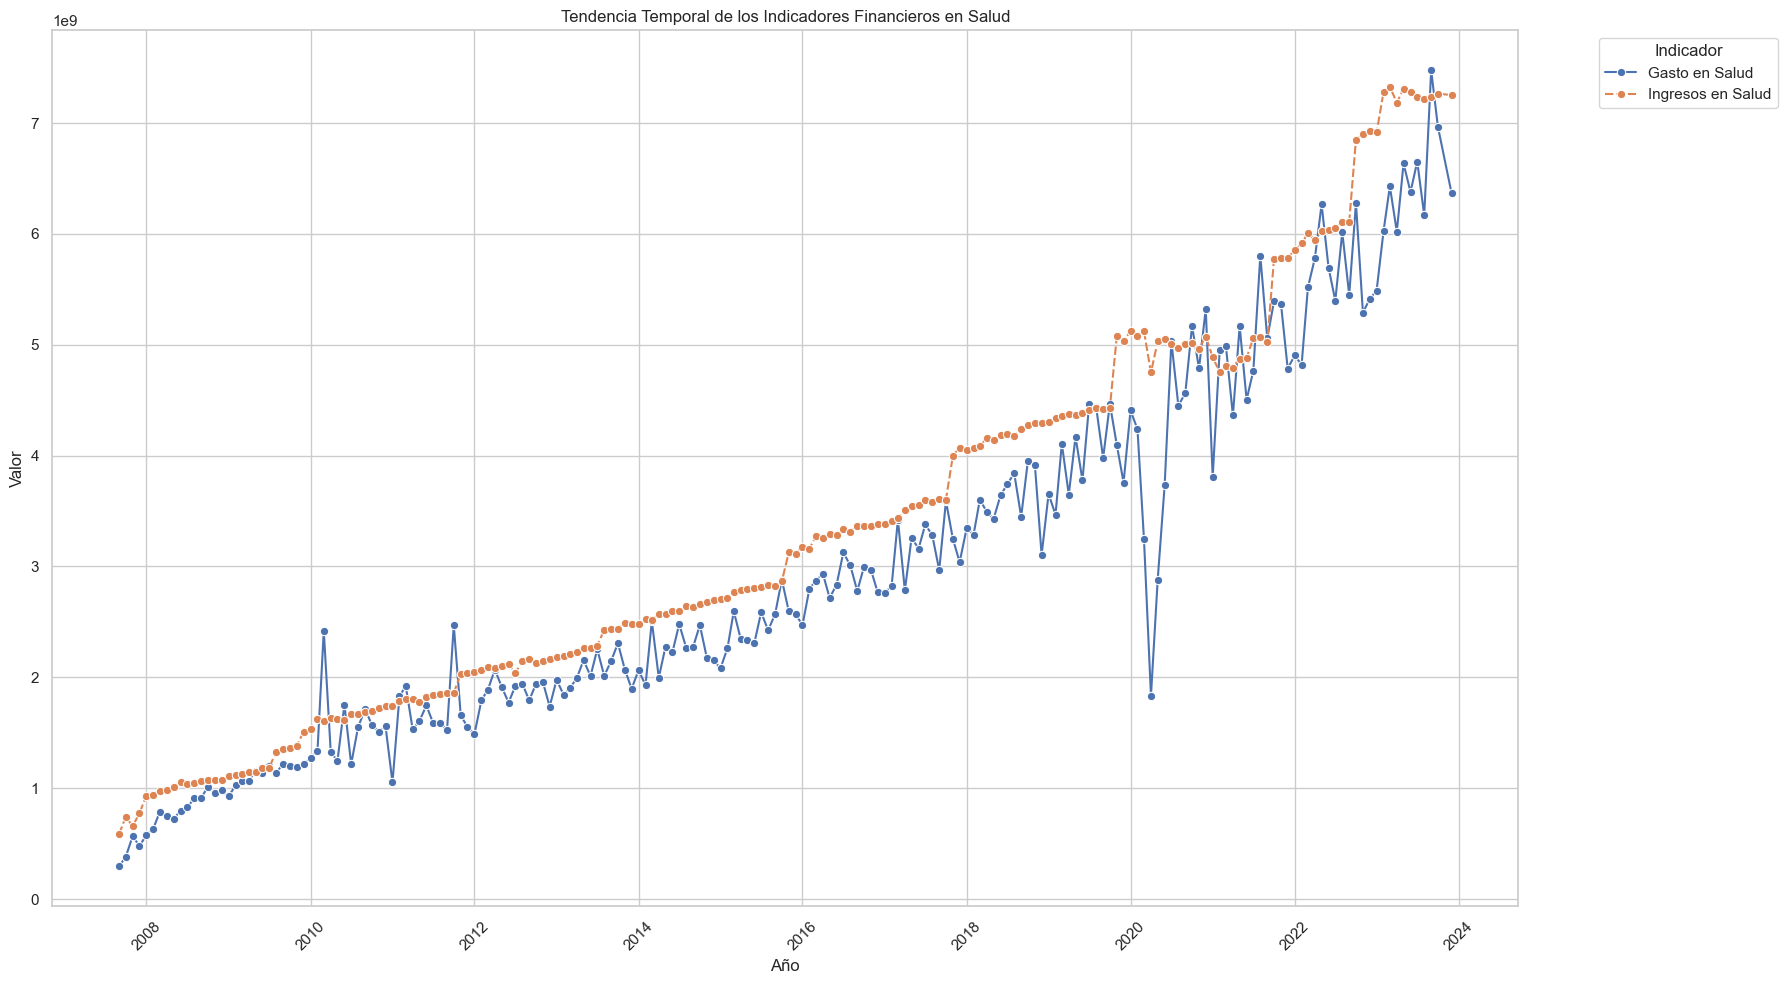

In [68]:

# Ahora, intentamos convertir la columna 'Fecha' a datetime nuevamente.
Finanzas_1['Fecha'] = pd.to_datetime(Finanzas_1['Periodo'], format='%Y%m', errors='coerce')



Finanzas_2 = Finanzas_1.groupby('Fecha')[['Ingresos en Salud', 'Gasto en Salud']].sum().reset_index()


# Crear un gráfico de líneas con Seaborn para el indicador 'Total'
plt.figure(figsize=(18, 10))


# Convertir el DataFrame de forma ancha a larga
Finanzas_2_melted = Finanzas_2.melt(id_vars=['Fecha'], value_vars=['Gasto en Salud', 'Ingresos en Salud'],
                                    var_name='Categoría', value_name='Valor')

# Crear el gráfico de líneas con Seaborn para mostrar 'Ingresos en Salud', 'Gasto en Salud' y 'Total'
plt.figure(figsize=(18, 10))
sns.lineplot(data=Finanzas_2_melted, x='Fecha', y='Valor', hue='Categoría', marker='o', style='Categoría')

plt.title('Tendencia Temporal de los Indicadores Financieros en Salud')
plt.xlabel('Año')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Indicador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Poblacion no afiliada 

In [69]:
Poblacion_Ocupacion

,Unnamed: 0,Ocupacion,Año,Poblacion,Sexo
0,1,Patrono o socio activo,2008,1.236760e+05,Hombre
1,2,Cuenta propia,2008,1.067294e+06,Hombre
2,3,Empleado del estado,2008,2.214090e+05,Hombre
3,4,Empleado privado,2008,8.577430e+05,Hombre
4,5,Familiar no remunerado,2008,4.661600e+04,Hombre
...,...,...,...,...,...
175,205,Cuenta propia,2022,5.561879e+05,Mujer
176,206,Empleado del estado,2022,3.664655e+05,Mujer
177,207,Empleado privado,2022,1.060910e+06,Mujer
178,208,Familiar no remunerado,2022,4.402080e+04,Mujer


In [70]:
Finanzas_1

,Periodo,Gasto en Salud,Total capitas,Titulares,Dependientes Directos,Dependientes Adicionales,Ingresos en Salud,TitularesM,Dependientes DirectosM,Dependientes AdicionalesM,Monto per Capita,Siniestralidad,Media Dependientes,Fecha,Año
0,200709,2.934182e+08,1207909,786177,419106,2626,5.838187e+08,3.799829e+08,2.025665e+08,1.269225e+06,483.330000,50.258457,0.533094,2007-09-01,2007
1,200710,3.809709e+08,1534269,955329,576040,2900,7.415582e+08,4.617392e+08,2.784174e+08,1.401657e+06,483.330000,51.374377,0.602976,2007-10-01,2007
2,200711,5.681702e+08,1360641,851660,507515,1466,6.576386e+08,4.116328e+08,2.452972e+08,7.085618e+05,483.330000,86.395499,0.595913,2007-11-01,2007
3,200712,4.772080e+08,1599467,1005990,586713,6764,7.730704e+08,4.862251e+08,2.835760e+08,3.269244e+06,483.330000,61.728919,0.583220,2007-12-01,2007
4,200801,5.778195e+08,1511121,936466,569690,4965,9.333933e+08,5.780082e+08,3.523082e+08,3.076797e+06,617.682675,61.905261,0.608340,2008-01-01,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,202307,6.652869e+09,4652895,2126933,2275635,250327,7.235013e+09,3.307342e+09,3.538386e+09,3.892843e+08,1554.948715,91.953792,1.069914,2023-07-01,2023
191,202308,6.168124e+09,4643328,2124770,2267364,251194,7.220555e+09,3.304143e+09,3.525775e+09,3.906368e+08,1555.038655,85.424517,1.067110,2023-08-01,2023
192,202309,7.477738e+09,4652645,2126042,2274513,252090,7.235013e+09,3.306088e+09,3.536896e+09,3.920298e+08,1555.032351,103.354864,1.069834,2023-09-01,2023
193,202310,6.966769e+09,4672810,2134779,2286062,251969,7.266053e+09,3.319645e+09,3.554565e+09,3.918432e+08,1554.964345,95.881067,1.070866,2023-10-01,2023


In [71]:
Afiliados = 2219339

Total_Poblacion = 2854431

Poblacion_NO_Afiliada = Total_Poblacion - Afiliados

print(f"Total de empleados que evaden el regimen contibutivo: {Poblacion_NO_Afiliada}")

display(TSS_2022)


Total de empleados que evaden el regimen contibutivo: 635092


,Rango Salarial,Poblacion
0,"Menos de RD$5,000",13172
1,"De RD$5,000 a RD$10,000",199255
2,"De RD$10,000 a RD$15,000",577944
3,"De RD$15,000 a RD$30,000",849295
4,"De RD$30,000 a RD$50,000",265327
5,"Más de RD$50,000",314346


In [72]:
print(TSS_2022.dtypes)

Rango Salarial    object
Poblacion          int64
dtype: object


Total de empleados que no están afiliados: 635092
Probabilidad estimada de que un salario no afiliado esté entre RD$15,000 y RD$30,000: 38.30%


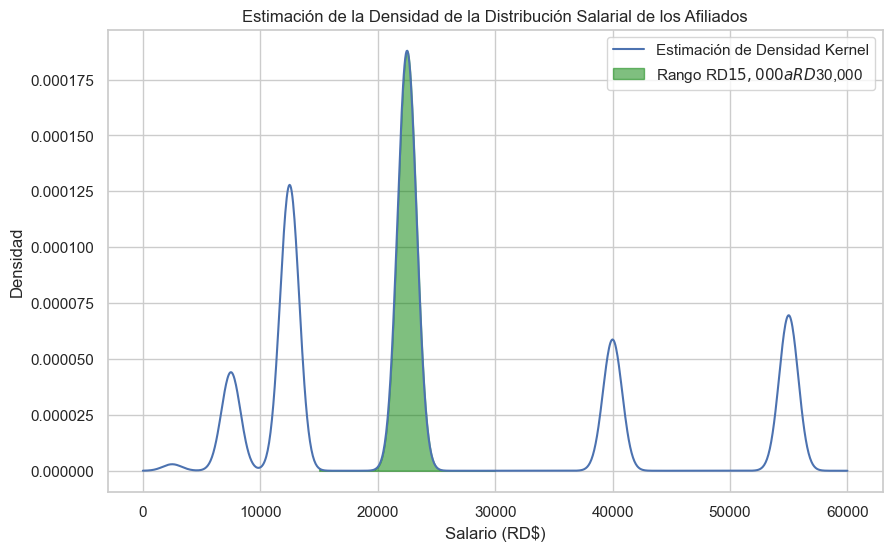

In [74]:
# Definimos la cantidad de afiliados y el total de la población que debería contribuir.
afiliados = 2219339
total_poblacion = 2854431

# Calculamos la población que no está afiliada.
pop_no_afiliada = total_poblacion - afiliados

# Definimos los puntos medios de los rangos salariales y la población correspondiente a cada rango.
# Estos valores son extraídos de la imagen que el usuario subió previamente.
salary_ranges_midpoints = np.array([2500, 7500, 12500, 22500, 40000, 55000])
population_per_range = np.array([13172, 199255, 577944, 849295, 265327, 314346])

# Creamos una muestra ponderada para la estimación de la densidad kernel utilizando los puntos medios
# y la población de cada rango.
sample = np.repeat(salary_ranges_midpoints, population_per_range)

# Estimamos la densidad kernel utilizando la muestra ponderada.
kde = gaussian_kde(sample)

# Creamos un rango de valores para el salario sobre el cual calcular la densidad.
salary_values = np.linspace(0, 60000, 1000)
density = kde(salary_values)

# Calculamos la probabilidad de que un salario caiga entre RD$15,000 y RD$30,000 utilizando la densidad estimada.
prob_15k_to_30k = kde.integrate_box_1d(15000, 30000)

# Presentamos los resultados.
print(f"Total de empleados que no están afiliados: {pop_no_afiliada}")
print(f"Probabilidad estimada de que un salario no afiliado esté entre RD$15,000 y RD$30,000: {prob_15k_to_30k:.2%}")

# Graficamos la estimación de densidad kernel para visualizar la distribución salarial.
plt.figure(figsize=(10, 6))
plt.plot(salary_values, density, label='Estimación de Densidad Kernel')
plt.fill_between(salary_values, density, where=(salary_values >= 15000) & (salary_values <= 30000), 
                 color='green', alpha=0.5, label='Rango RD$15,000 a RD$30,000')
plt.title('Estimación de la Densidad de la Distribución Salarial de los Afiliados')
plt.xlabel('Salario (RD$)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
density

array([2.55475505e-08, 3.19898517e-08, 3.98382638e-08, 4.93416646e-08,
       6.07788400e-08, 7.44588346e-08, 9.07204673e-08, 1.09930838e-07,
       1.32482653e-07, 1.58790206e-07, 1.89283877e-07, 2.24403047e-07,
       2.64587361e-07, 3.10266335e-07, 3.61847381e-07, 4.19702377e-07,
       4.84153015e-07, 5.55455242e-07, 6.33783188e-07, 7.19213079e-07,
       8.11707681e-07, 9.11101898e-07, 1.01709019e-06, 1.12921644e-06,
       1.24686702e-06, 1.36926750e-06, 1.49548369e-06, 1.62442729e-06,
       1.75486653e-06, 1.88544175e-06, 2.01468599e-06, 2.14105010e-06,
       2.26293204e-06, 2.37870950e-06, 2.48677517e-06, 2.58557329e-06,
       2.67363675e-06, 2.74962310e-06, 2.81234859e-06, 2.86081881e-06,
       2.89425488e-06, 2.91211429e-06, 2.91410557e-06, 2.90019615e-06,
       2.87061331e-06, 2.82583799e-06, 2.76659175e-06, 2.69381752e-06,
       2.60865460e-06, 2.51240907e-06, 2.40652055e-06, 2.29252661e-06,
       2.17202588e-06, 2.04664133e-06, 1.91798476e-06, 1.78762353e-06,
      

In [75]:
# Calcular probabilidades para diferentes rangos salariales
prob_below_15k = kde.integrate_box_1d(0, 15000)
prob_15k_to_30k = kde.integrate_box_1d(15000, 30000)
prob_above_30k = kde.integrate_box_1d(30000, salary_values[-1])
prob_below_30k = prob_below_15k + prob_15k_to_30k

expected_salary = (salary_values * density).sum() / density.sum()

pop_no_afiliada = 635092

expected_contribution_per_person = expected_salary * 0.1013

total_expected_contribution = expected_contribution_per_person * pop_no_afiliada

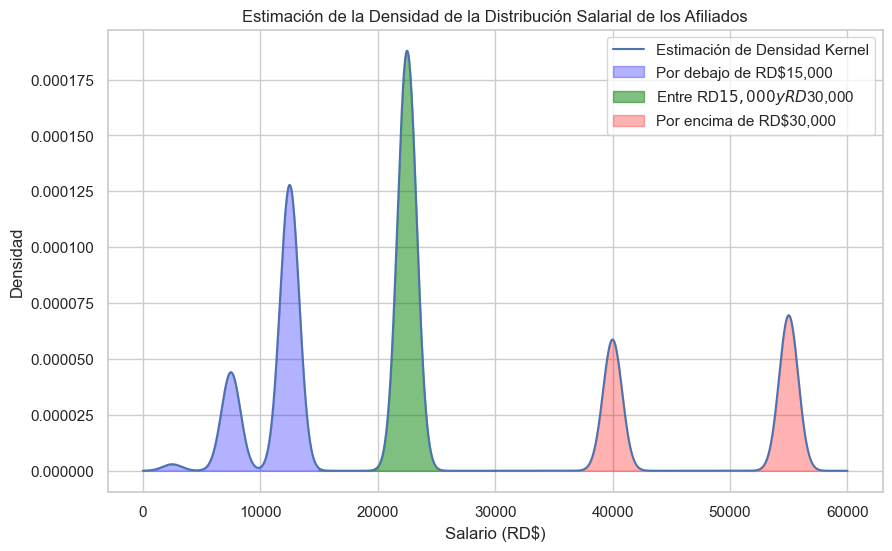

Probabilidad de que un salario esté por debajo de RD$15,000: 35.59%
Probabilidad de que un salario esté entre RD$15,000 y RD$30,000: 38.30%
Probabilidad de que un salario esté por encima de RD$30,000: 26.12%
Probabilidad de que un salario esté por debajo de RD$30,000: 73.88%


In [ ]:
# Añadimos impresiones para mostrar la información sobre las probabilidades.

# Visualizamos la estimación de densidad kernel con las áreas de interés
plt.figure(figsize=(10, 6))
plt.plot(salary_values, density, label='Estimación de Densidad Kernel')

# Área por debajo de RD$15,000
plt.fill_between(salary_values, density, where=(salary_values <= 15000), 
                 color='blue', alpha=0.3, label='Por debajo de RD$15,000')

# Área entre RD$15,000 y RD$30,000
plt.fill_between(salary_values, density, where=(salary_values > 15000) & (salary_values <= 30000), 
                 color='green', alpha=0.5, label='Entre RD$15,000 y RD$30,000')

# Área por encima de RD$30,000
plt.fill_between(salary_values, density, where=(salary_values > 30000), 
                 color='red', alpha=0.3, label='Por encima de RD$30,000')

plt.title('Estimación de la Densidad de la Distribución Salarial de los Afiliados')
plt.xlabel('Salario (RD$)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# Imprimimos las probabilidades
print(f"Probabilidad de que un salario esté por debajo de RD$15,000: {prob_below_15k:.2%}")
print(f"Probabilidad de que un salario esté entre RD$15,000 y RD$30,000: {prob_15k_to_30k:.2%}")
print(f"Probabilidad de que un salario esté por encima de RD$30,000: {prob_above_30k:.2%}")
print(f"Probabilidad de que un salario esté por debajo de RD$30,000: {prob_below_30k:.2%}")


In [ ]:
# Puntos medios asignados a los rangos salariales
salary_ranges_midpoints = np.array([2500, 7500, 12500, 22500, 40000, 55000])
population_per_range = np.array([13172, 199255, 577944, 849295, 265327, 314346])

In [ ]:


# Definimos los puntos medios de los rangos salariales y la población correspondiente a cada rango.
# Estos valores son extraídos de la imagen que el usuario subió previamente.
salary_ranges_midpoints = np.array([2500, 7500, 12500, 22500, 40000, 55000])
population_per_range = np.array([13172, 199255, 577944, 849295, 265327, 314346])

# Creamos una muestra ponderada para la estimación de la densidad kernel utilizando los puntos medios
# y la población de cada rango.
sample = np.repeat(salary_ranges_midpoints, population_per_range)


# Generar muestra ponderada para KDE
sample = np.repeat(salary_ranges_midpoints, population_per_range)


kde = gaussian_kde(sample)

# Rango de valores salariales para calcular la densidad
salary_values = np.linspace(0, 60000, 1000)
density = kde(salary_values)

# Calcular probabilidades para diferentes rangos salariales
prob_below_15k = kde.integrate_box_1d(0, 15000)
prob_15k_to_30k = kde.integrate_box_1d(15000, 30000)
prob_above_30k = kde.integrate_box_1d(30000, salary_values[-1])
prob_below_30k = prob_below_15k + prob_15k_to_30k

# Calcular el salario medio esperado
expected_salary = (salary_values * density).sum() / density.sum()

# Población no afiliada
pop_no_afiliada = 635092

# Calcular el aporte esperado por persona (10.13% del salario medio)
expected_contribution_per_person = expected_salary * 0.1013

# Calcular el aporte total esperado de los no afiliados
total_expected_contribution = expected_contribution_per_person * pop_no_afiliada

# Visualizar la distribución y áreas de interés
plt.figure(figsize=(10, 6))
plt.plot(salary_values, density, label='Estimación de Densidad Kernel')
plt.fill_between(salary_values, density, where=(salary_values <= 15000), color='blue', alpha=0.3, label='Por debajo de RD$15,000')
plt.fill_between(salary_values, density, where=(salary_values > 15000) & (salary_values <= 30000), color='green', alpha=0.5, label='Entre RD$15,000 y RD$30,000')
plt.fill_between(salary_values, density, where=(salary_values > 30000), color='red', alpha=0.3, label='Por encima de RD$30,000')
plt.title('Estimación de la Densidad de la Distribución Salarial de los Afiliados')
plt.xlabel('Salario (RD$)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir las probabilidades y el aporte esperado
print(f"Probabilidad de que un salario esté por debajo de RD$15,000: {prob_below_15k:.2%}")
print(f"Probabilidad de que un salario esté entre RD$15,000 y RD$30,000: {prob_15k_to_30k:.2%}")
print(f"Probabilidad de que un salario esté por encima de RD$30,000: {prob_above_30k:.2%}")
print(f"Probabilidad de que un salario esté por debajo de RD$30,000: {prob_below_30k:.2%}")
print(f"Salario medio esperado: RD${expected_salary:.2f}")
print(f"Aporte esperado por persona: RD${expected_contribution_per_person:.2f}")
print(f"Aporte total esperado de los no afiliados: RD${total_expected_contribution:.2f}")


NameError: name 'density' is not defined

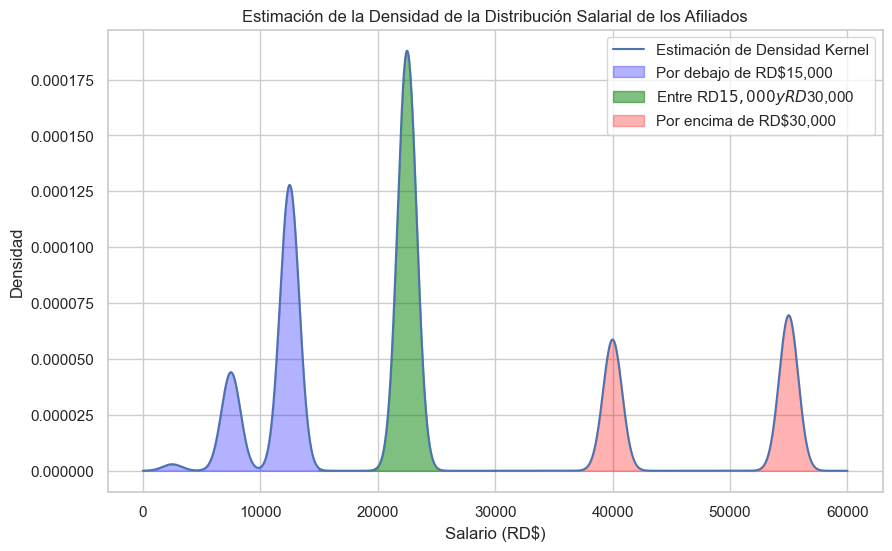

Probabilidad de que un salario esté por debajo de RD$15,000: 35.59%
Probabilidad de que un salario esté entre RD$15,000 y RD$30,000: 38.30%
Probabilidad de que un salario esté por encima de RD$30,000: 26.12%
Probabilidad de que un salario esté por debajo de RD$30,000: 73.88%
Salario medio esperado: RD$25126.04
Aporte esperado por persona: RD$2545.27
Aporte total esperado de los no afiliados: RD$1616479141.53


In [ ]:
# Visualizar la distribución y áreas de interés
plt.figure(figsize=(10, 6))
plt.plot(salary_values, density, label='Estimación de Densidad Kernel')
plt.fill_between(salary_values, density, where=(salary_values <= 15000), color='blue', alpha=0.3, label='Por debajo de RD$15,000')
plt.fill_between(salary_values, density, where=(salary_values > 15000) & (salary_values <= 30000), color='green', alpha=0.5, label='Entre RD$15,000 y RD$30,000')
plt.fill_between(salary_values, density, where=(salary_values > 30000), color='red', alpha=0.3, label='Por encima de RD$30,000')
plt.title('Estimación de la Densidad de la Distribución Salarial de los Afiliados')
plt.xlabel('Salario (RD$)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir las probabilidades y el aporte esperado
print(f"Probabilidad de que un salario esté por debajo de RD$15,000: {prob_below_15k:.2%}")
print(f"Probabilidad de que un salario esté entre RD$15,000 y RD$30,000: {prob_15k_to_30k:.2%}")
print(f"Probabilidad de que un salario esté por encima de RD$30,000: {prob_above_30k:.2%}")
print(f"Probabilidad de que un salario esté por debajo de RD$30,000: {prob_below_30k:.2%}")
print(f"Salario medio esperado: RD${expected_salary:.2f}")
print(f"Aporte esperado por persona: RD${expected_contribution_per_person:.2f}")
print(f"Aporte total esperado de los no afiliados: RD${total_expected_contribution:.2f}")

In [ ]:
Ingreso_Dic = 6926953144.39
Gasto_dic =5412747463.91
Diferencia_Actual = (Ingreso_Dic - Gasto_dic) 
saldo = Diferencia_Actual - Diferencia_Actual*0.10
print(saldo)

1362785112.4320004


In [ ]:
Dependencias = 1.10
nuevos_afiliados = 635092 * Dependencias
capitas_dic = 4649234
nueva_capitas = capitas_dic + nuevos_afiliados
capita = 1326.74003412452
Nuevo_Ingreso_Dic = nueva_capitas* capita


Siniestros = 0.7814
Nuevo_Gasto = Nuevo_Ingreso_Dic * Siniestros
Nuevo_Saldo = Nuevo_Ingreso_Dic - Nuevo_Gasto




Diferencia_Actual = (Ingreso_Dic - Gasto_dic) 
saldo = Diferencia_Actual - Diferencia_Actual*0.10
print(nueva_capitas)
print(Nuevo_Ingreso_Dic)
print(Nuevo_Gasto)
print(Nuevo_Saldo)



5347835.2
7095187055.74031
5544179165.355478
1551007890.3848314


In [ ]:
IPC_IPC

,Fecha,Alimentos y Bebidas no Alcohólicas,Alimentos y Bebidas no Alcohólicas %,Bebidas Alcohólicas y Tabaco,Bebidas Alcohólicas y Tabaco %,Prendas de Vestir y Calzado,Prendas de Vestir y Calzado%,Vivienda,Vivienda %,Muebles,...,Comunicaciones,Comunicaciones %,Recreación y Cultura,Recreación y Cultura %,Educación,Educación %,Restaurantes y Hoteles,Restaurantes y Hoteles %,Bienes y Servicios Diversos,Bienes y Servicios Diversos %
0,201001,95.276965,0.545605,96.676348,1.560970,95.798841,0.468293,92.186338,1.319205,97.856838,...,98.229729,0.000000,96.787149,-0.045602,92.222861,0.481681,99.479048,-1.580827,95.348996,0.180518
1,201002,96.172944,0.940394,98.662504,2.054439,96.198691,0.417385,92.361517,0.190028,97.986408,...,98.229729,0.000000,97.064168,0.286214,92.222861,0.000000,99.522876,0.044058,95.677461,0.344487
2,201003,97.191807,1.059407,98.927519,0.268607,96.526634,0.340902,92.464927,0.111962,98.199063,...,98.073664,-0.158877,97.017048,-0.048545,92.222861,0.000000,99.301438,-0.222499,95.957349,0.292533
3,201004,97.340328,0.152813,98.453038,-0.479625,96.735288,0.216161,92.463696,-0.001331,98.286735,...,98.073664,0.000000,97.215838,0.204902,92.222861,0.000000,99.920214,0.623129,96.250889,0.305907
4,201005,97.409451,0.071011,99.120686,0.678139,97.212442,0.493258,92.755831,0.315946,98.364775,...,98.073664,0.000000,97.474887,0.266468,93.439136,1.318843,99.775816,-0.144513,96.542892,0.303377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,202308,134.932300,1.271330,125.077100,0.114540,100.320800,-0.147608,120.818100,0.221815,119.240000,...,94.990300,0.015162,111.516800,0.454997,114.092800,1.807305,130.140000,0.228892,127.598100,0.245038
164,202309,136.370300,1.065720,125.231500,0.123444,100.299700,-0.021033,120.897000,0.065305,119.373900,...,94.904600,-0.090220,111.173400,-0.307936,116.847100,2.414087,130.807000,0.512525,128.125100,0.413016
165,202310,136.520000,0.110000,125.380000,0.120000,100.160000,-0.140000,120.960000,0.060000,119.620000,...,94.850000,-0.060000,111.310000,0.120000,116.850000,0.000000,131.270000,0.350000,128.670000,0.420000
166,202311,136.340000,-0.130000,125.570000,0.150000,99.420000,-0.740000,121.060000,0.080000,119.500000,...,94.850000,0.000000,111.300000,-0.010000,116.850000,0.000000,132.200000,0.710000,129.330000,0.510000


In [ ]:
Prestaciones_1.head(13)

,Fecha,Descripcion,Porcentaje Capita,Porcentaje Monto
0,2007,Prevención y Promoción,0.092910,0.074257
1,2007,Atención Ambulatoria,0.198652,0.137760
2,2007,Servicios Odontológicos,0.000630,0.000356
3,2007,Emergencia,0.159732,0.121360
4,2007,Hospitalización,0.105660,0.285986
5,2007,Partos,0.011712,0.062065
6,2007,Cirugía,0.016849,0.079398
7,2007,Apoyo Diagnóstico (Dx) en Internamiento y Ambu...,0.400688,0.203030
8,2007,Atenciones de Alto Costo y de Máximo Nivel de ...,0.007336,0.025525
9,2007,Rehabilitación,0.000788,0.000604


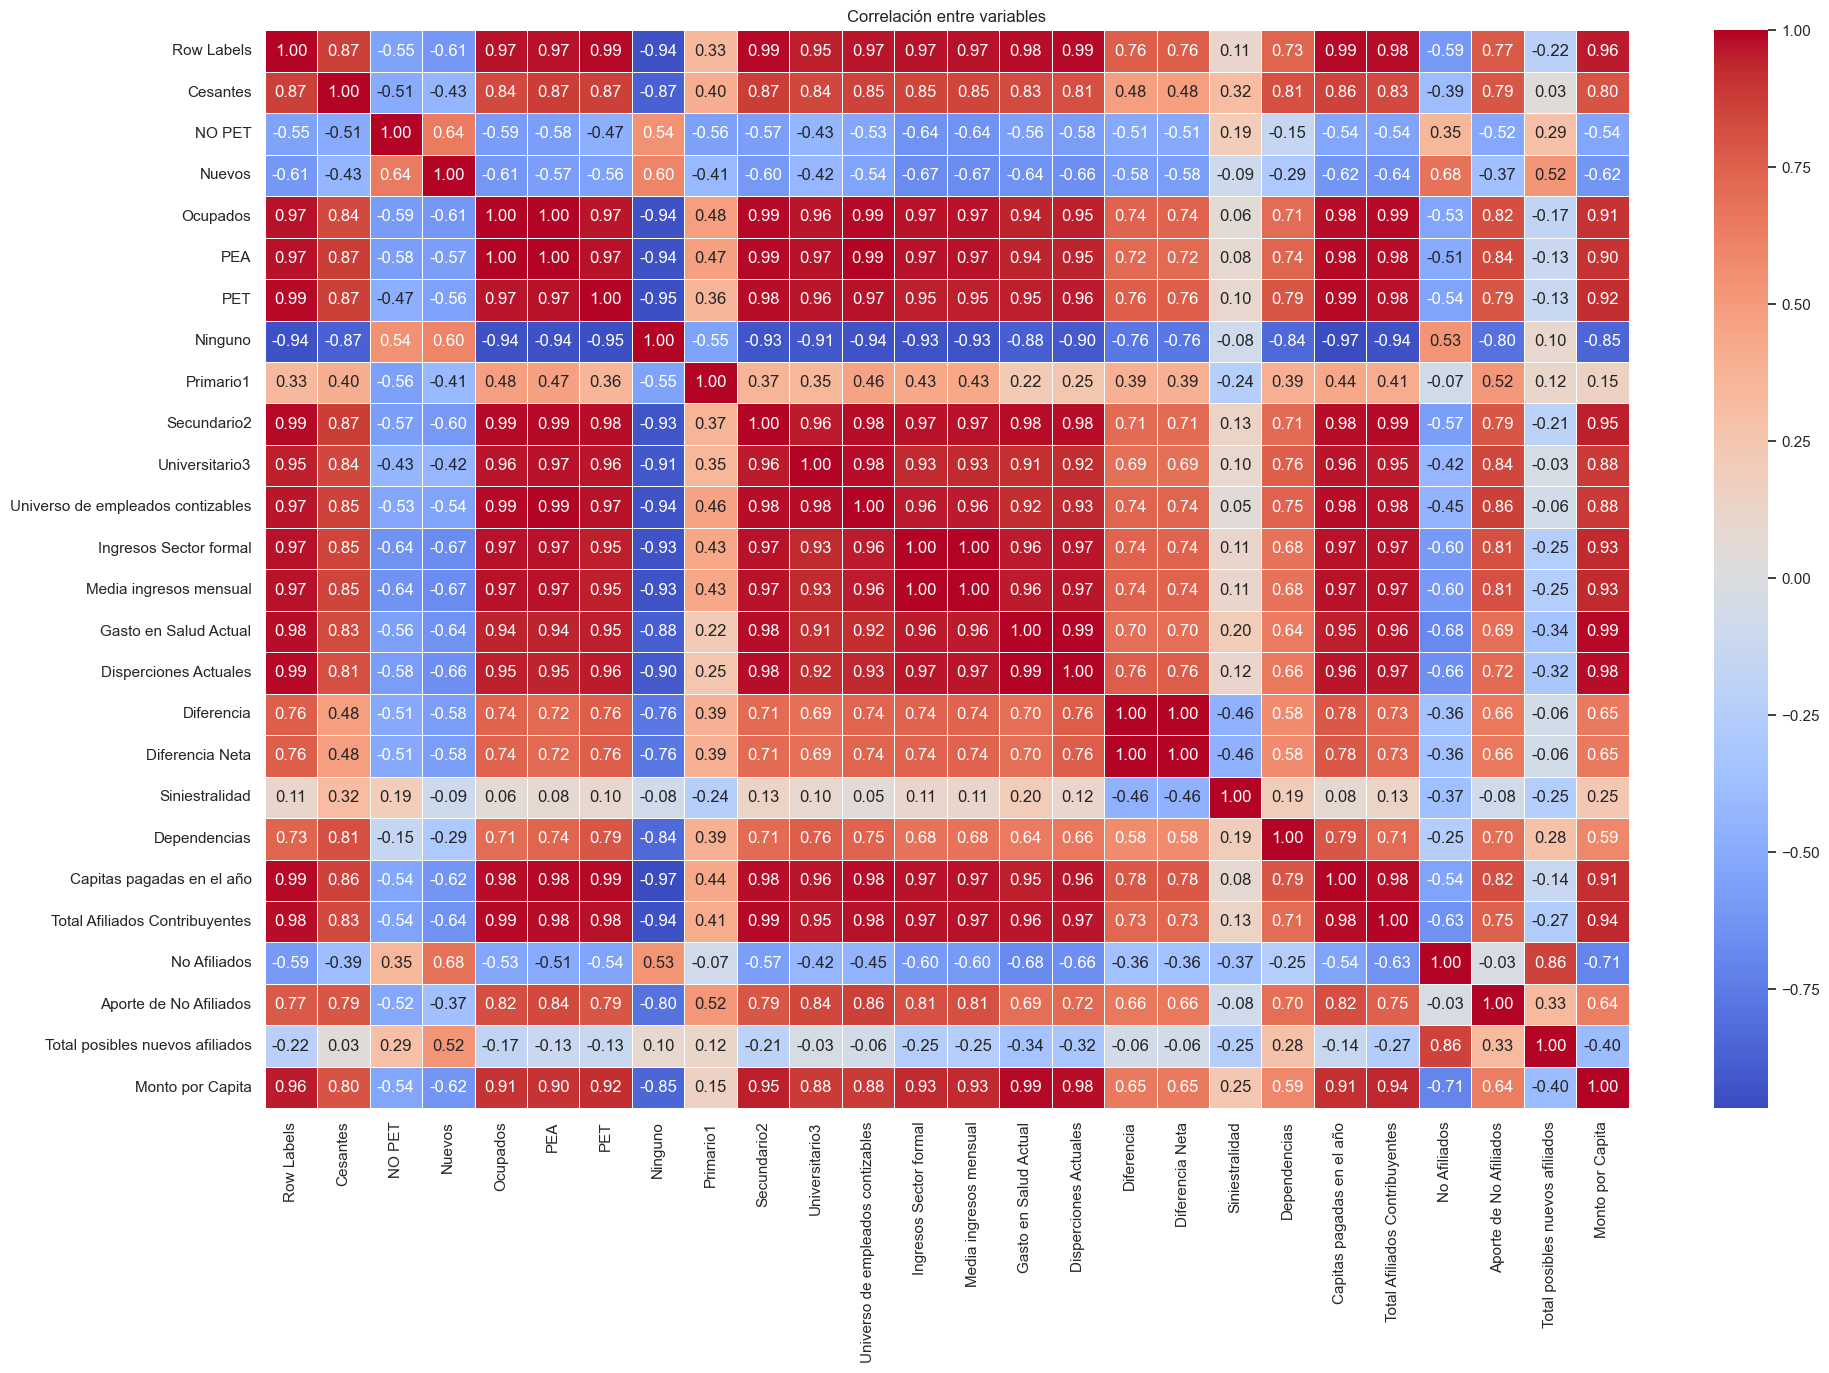

In [ ]:

corr_matrix = corr2_1.corr()

plt.figure(figsize=(22, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre variables')
plt.show()

In [ ]:
corr_Sheet1

,Row Labels,Sum of Afiliados NO C,Sum of Afiliados C,19 o menos C,20-24C,25-29C,30-34C,35-39C,40-44C,45-49C,...,Dependientes Directos,Dependientes Adicionales,Ingresos en Salud,Titulares.1,Dependientes Directos.1,Dependientes Adicionales.1,Monto per Capita,Siniestralidad,Media Dependientes,IPC Salud
0,200709,402546,805496,13946,113934,150997,132149,114105,95711,67735,...,419106,2626,5.838187e+08,3.799829e+08,2.025665e+08,1.269225e+06,483.330000,50.258457,0.533094,NaN
1,200710,481568,903242,15158,117524,159654,144643,128093,112643,83289,...,576040,2900,7.415582e+08,4.617392e+08,2.784174e+08,1.401657e+06,483.330000,51.374377,0.602976,NaN
2,200711,506475,915500,15157,120185,162489,146628,129848,113663,84260,...,507515,1466,6.576386e+08,4.116328e+08,2.452972e+08,7.085618e+05,483.330000,86.395499,0.595913,NaN
3,200712,535562,941619,16471,123660,167527,150944,133129,116299,86376,...,586713,6764,7.730704e+08,4.862251e+08,2.835760e+08,3.269244e+06,483.330000,61.728919,0.583220,NaN
4,200801,546150,939349,15189,122154,166908,151205,133210,116327,86620,...,569690,4965,9.333933e+08,5.780082e+08,3.523082e+08,3.076797e+06,617.682675,61.905261,0.608340,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,202307,2360274,2213092,35431,269145,336338,341703,280185,255348,204293,...,2275635,250327,7.235013e+09,3.307342e+09,3.538386e+09,3.892843e+08,1554.948715,91.953792,1.069914,119.1296
191,202308,2338598,2213792,36012,269642,336223,341984,279953,254776,204561,...,2267364,251194,7.220555e+09,3.304143e+09,3.525775e+09,3.906368e+08,1555.038655,85.424517,1.067110,119.6559
192,202309,2343244,2225126,36021,270970,338786,344522,281393,255777,205506,...,2274513,252090,7.235013e+09,3.306088e+09,3.536896e+09,3.920298e+08,1555.032351,103.354864,1.069834,120.0092
193,202310,2349634,2230413,36443,270928,338061,345738,282160,257118,207014,...,2286062,251969,7.266053e+09,3.319645e+09,3.554565e+09,3.918432e+08,1554.964345,95.881067,1.070866,120.4000


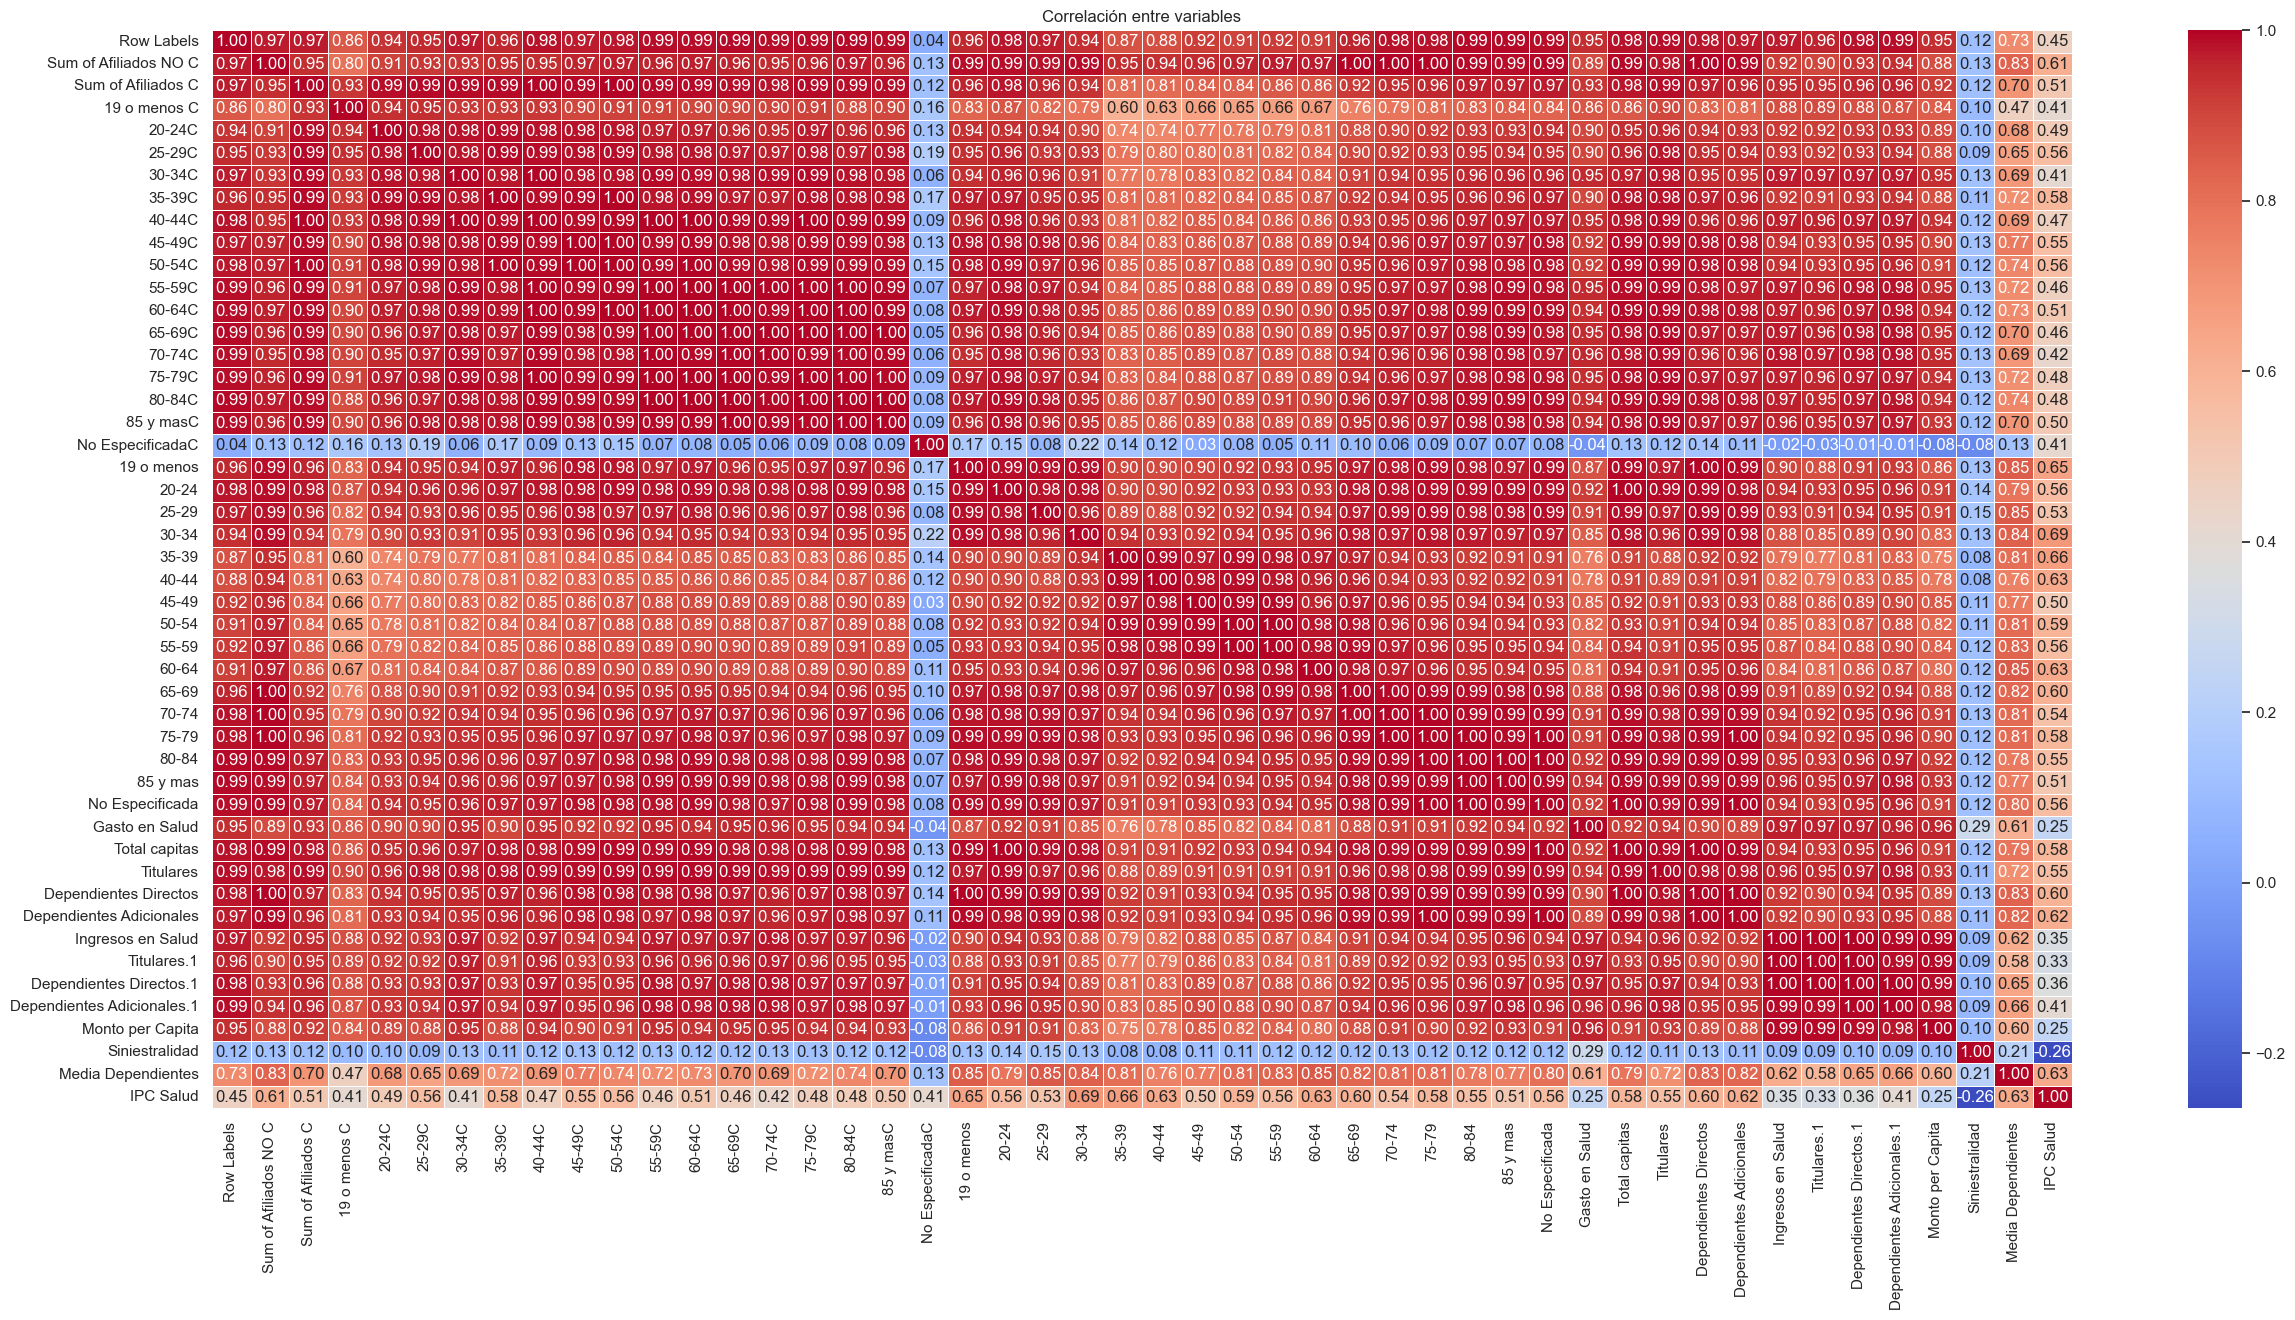

In [ ]:

corr_matrix = corr_Sheet1.corr()

plt.figure(figsize=(30, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre variables')
plt.show()